In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
palm = cv2.imread('palm.jpg', 0)

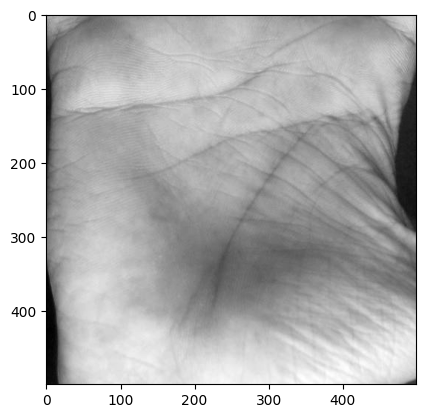

In [4]:
# display the image using matplotlib
plt.imshow(palm, cmap='gray')

In [1]:
from tensorflow.keras.models import load_model

encoder = load_model('../palm_encoder/savedModel/encoder_model/')

In [115]:
import numpy as np
from PIL import Image
import glob

img = Image.open('../../IITD Palmprint V1/Segmented/Left/001_1.bmp')
palm = np.array(img)

In [116]:
palm.shape

(150, 150)

In [119]:
# straight = encoder.predict(palm.reshape(1,22500))
straight = encoder.predict(palm.reshape(-1, 150, 150, 1))
print(straight)

1/1 [==============================] - 3s 3s/step
[[1943.0557     0.      1401.2538     0.         0.       987.8666
  3091.6602     0.         0.      2713.428      0.      2675.8057
     0.       436.5528     0.      5217.5664     0.       781.3744
     0.      4072.7932  4079.2412     0.         0.      1825.6888
     0.      5511.784      0.      2597.0317     0.       871.80884
  5008.403      0.     ]]


In [121]:
img = Image.open('../../IITD Palmprint V1/Segmented/Left/001_1.bmp').rotate(180)
palm = np.array(img)
rotated = encoder.predict(palm.reshape(-1, 150, 150, 1))
print(rotated)

1/1 [==============================] - 1s 1s/step
[[1879.5187     0.      1379.392      0.         0.       926.7301
  3099.7473     0.         0.      2647.6167     0.      2656.7986
     0.       386.99838    0.      5130.23       0.       742.54865
     0.      4049.397   3989.3662     0.         0.      1817.755
     0.      5440.3755     0.      2544.837      0.       849.85284
  4918.674      0.     ]]


In [122]:
np.mean(np.abs(straight - rotated))

24.114094

In [125]:
diff_img = Image.open('../../IITD Palmprint V1/Segmented/Left/008_3.bmp')
diff_palm = np.array(diff_img)  

diff = encoder.predict(diff_palm.reshape(-1, 150, 150, 1))
print(diff)
np.mean(np.abs(straight - diff))

1/1 [==============================] - 1s 853ms/step
[[2151.8428     0.      1560.8394     0.         0.      1089.6621
  3487.4775     0.         0.      3019.8354     0.      2997.1267
     0.       484.54996    0.      5822.8955     0.       861.038
     0.      4565.9863  4563.1196     0.         0.      2056.0686
     0.      6168.1406     0.      2894.1155     0.       968.71344
  5608.4146     0.     ]]


158.89099

-------

## Connecting to AWS SageMaker Endpoint